In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/amazon-prime-dataset/amazon_prime_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [3]:
#data'nin ilk 5 satirnin gormeye calisiyoruz.(# we try to see the first 5 lines of the data.)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
#  Data icerisindeki  sutunlari gormeye calisiyoruz (# We are trying to see the columns in the data)
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#  Data icerisindeki temel istatistik degerlerini gormeye calisiyoruz. # We are trying to see the basic statistic values in the data. 

# 0 dan sonra 2 basamak vermesi icin ise round(2)  kullaniyoruz. # We use round(2) to return 2 digits after 0.
data.describe().round(2)

,release_year
count,9668.00
mean,2008.34
std,18.92
min,1920.00
25%,2007.00
50%,2016.00
75%,2019.00
max,2021.00


In [6]:
# Data icerisindeki cift deger var mi kontrolunu sagliyoruz. # We check if there is a double value in the data.
data.duplicated().sum()

0

In [7]:
# Data icerisindeki sayisal verii tiplerini 'numeric_columns' degiskenine atiyoruz. # We assign the numeric data types in the data to the variable 'numeric_columns'.
numeric_columns = data.select_dtypes(include = ['number']).columns

# Sayisal sutunlarin NaN degerlerini ortalama ile dolduruyoruz. # We fill the NaN values of the numeric columns with the average.
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [8]:
#Data degisskenin temel bilgilerine bakiyoruz. We are looking at the basic information of the #Data variable.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [9]:
# Sadece 7 release_year  9668 non-null   int64  olarak gorunmekte digerleri ise object olarak gorunmektedir. 
# Only 7 release_year 9668 appears as non-null int64 and the others appear as objects.

In [10]:
# NA olanlari kontrol ediyoruz. # We check the NAs.
data.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
#director        2083
#cast            1233
#country         8996
#date_added      9513
#rating           337 NA 

In [12]:
# cast sutunundaki NA degerlerinin 'Unknown' ile degistiriyoruz. # We replace the NA values in the cast column with 'Unknown'.
data['cast'].fillna('Unknown', inplace  = True)

/tmp/ipykernel_18/779317348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cast'].fillna('Unknown', inplace  = True)


In [13]:
# diger NA degerlere Unknown gelmesi gereknelere de bunu uyguluyoruz. # we also apply this to other NA values that should be Unknown.
data['director'].fillna('Unknown', inplace  = True)
data['date_added'].fillna('Unknown', inplace  = True)

/tmp/ipykernel_18/3306924113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Unknown', inplace  = True)
/tmp/ipykernel_18/3306924113.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [14]:
# Na degerleerinin MOD ilel doldurmak istedigimiz dutunlar icin sutunlardaki mod degerlerini olusturuyoruz.
# We create the mod values in the columns for the columns we want to fill with MOD of the Na values.
mc_country = data['country'].mode()[0]
mc_rating = data['rating'].mode()[0]

#Olusturmus oldugumuz mod degerlerini ilgili sutunlarda  ki NA degelerinin yerine yerlestiriyoruz.
#We replace the mode values we have created with the NA values in the corresponding columns.
data['country'].fillna(mc_country, inplace  = True)
data['rating'].fillna(mc_rating, inplace  = True) 

/tmp/ipykernel_18/1837528317.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna(mc_country, inplace  = True)
/tmp/ipykernel_18/1837528317.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [15]:
#Isimize yaramayacak olan sutunlari kaldiriyoruz. #We remove the columns that are not useful to us.
remove1 = ['description','show_id']
data = data.drop(columns = remove1)


In [16]:
#Yapmis oldugum islerimlerin gerceklestigini gorebilmek icin kontrol ediyoruz.
# We're checking to see that the work I've done has been accomplished.
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [17]:
# Data icerisinde rastgele 10 adet veriyi secip kontrol saglayalim. # Let's select 10 random data in the data and check them.
data.sample(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6900,Movie,Tale of Tarot,Alexander Hammett,"Shalom Omo-Osagie, Sadia Alao, Emmanuel West",United States,Unknown,2021,ALL,40 min,"Drama, Romance"
3052,Movie,Black Sabbath - Paranoid (Classic Album),Matthew Longfellow,Black Sabbath,United States,Unknown,2010,16+,55 min,"Documentary, Music Videos and Concerts"
4550,Movie,The Hornet's Nest,"Christian Tureaud, David Salzberg","Mike Boettcher, Carlos Boettcher",United States,Unknown,2014,R,97 min,Documentary
4260,Movie,A Year and Change,R. Stephen Suettinger,"Bryan Greenberg, T.R. Knight, Claire van der B...",United States,Unknown,2015,13+,92 min,"Comedy, Drama"
8773,Movie,Scorned,Mark Jones,"Billy Zane, AnnaLynne McCord, Viva Bianca",United States,Unknown,2014,R,86 min,"Horror, Suspense"
4972,TV Show,Lynx,Unknown,"Anastasia Ivanova, Vlad Nikityuk, Anastasia Ts...",United States,Unknown,2020,16+,1 Season,Drama
3759,Movie,Stay Tuned,Peter Hyams,"John Ritter, Pam Dawber",United States,Unknown,1992,PG,88 min,"Animation, Comedy, Science Fiction"
9447,TV Show,Ivanhoe,Unknown,"Stephen Waddington, Christopher Lee, Siân Phil...",United States,Unknown,1997,13+,1 Season,"Action, Drama, Romance"
7359,Movie,Last Days,Biodun Stephen,Unknown,United States,Unknown,2021,7+,146 min,Drama
200,Movie,Valentine Road,Marta Cunningham,Dawn Boldrin,United States,Unknown,2013,16+,88 min,Documentary


In [18]:
# Rating sutununda bulunan tanimlamalara bakalim. 
#Let's look at the definitions in the # Rating column.
data['rating'].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [19]:
# rating_counts isimli bir degisken olusturup icerisinde tanimlamalardan sirali olarak kac tane oldugunu gozlemleyelim.
# Let's create a variable called rating_counts and observe how many of the descriptions are in it sequentially.
rating_counts = data['rating'].value_counts()
rating_counts

rating
13+         2454
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

In [20]:
# Unknown olan yonetmen isimlerini oncelikle cikartik ve degisken adini filtered_direction yaptik.
# We first remove the unknown director names and change the variable name to filtered_direction.
filtered_directors = data[data['director'] != 'Unknown']

#En cok film yapan yonetmenlerin adlarini getirebilmek cin ise top_director isimli degiskeni olusturduk.
#To get the names of the directors who made the most movies, we created a variable called top_director.
top_directors = filtered_directors['director'].value_counts().head(10)

#Ciktinin daha goze guzel gorunmesi icin baslik olusuturp yazdirdik.
#To make the printout more eye-catching, we created a caption and had it written.
print('Top 10 Directors who have made the most movies:')
print(top_directors)

Top 10 Directors who have made the most movies:
director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64


In [21]:
#Aynisini cast sutunu icin de duzenledik.
# We did the same for the cast column.
filtered_actors = data[data['cast'] != 'Unknown']
top_actors = filtered_actors['cast'].value_counts().head(10)
print('\nTop 10 Actors who have made the most movies:')
print(top_actors)


Top 10 Actors who have made the most movies:
cast
Maggie Binkley                      56
1                                   34
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Stevin John                         11
Gallagher                            9
LB, Aaron Michael                    9
Eddie Izzard                         9
Name: count, dtype: int64


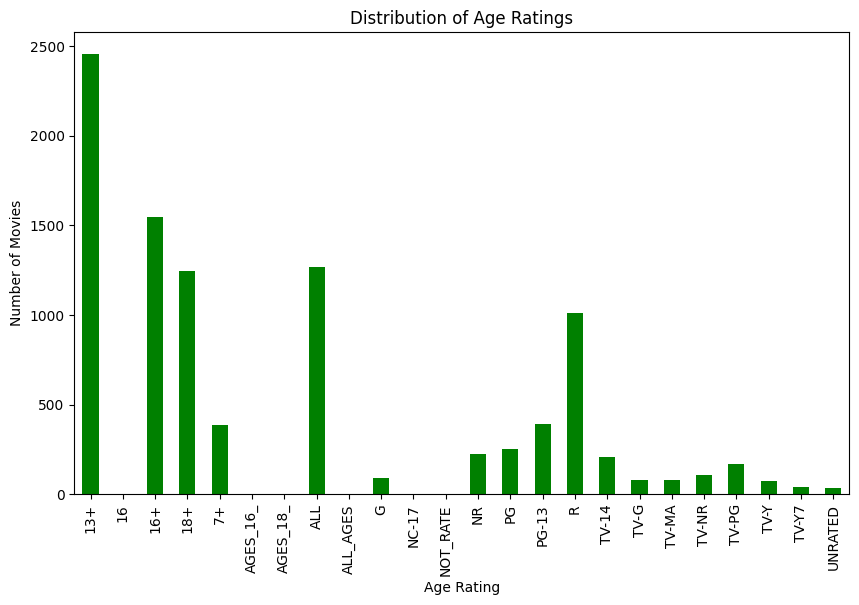

In [22]:
# Rating sutunun yasa gore siniflandirmasinin grafigini cizelim.
# Let's graph the classification of the rating column by law.

plt.figure(figsize = (10,6))
rating_counts.sort_index().plot(kind = 'bar', color = 'green')
plt.title('Distribution of Age Ratings')
plt.xlabel('Age Rating')
plt.ylabel('Number of Movies')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


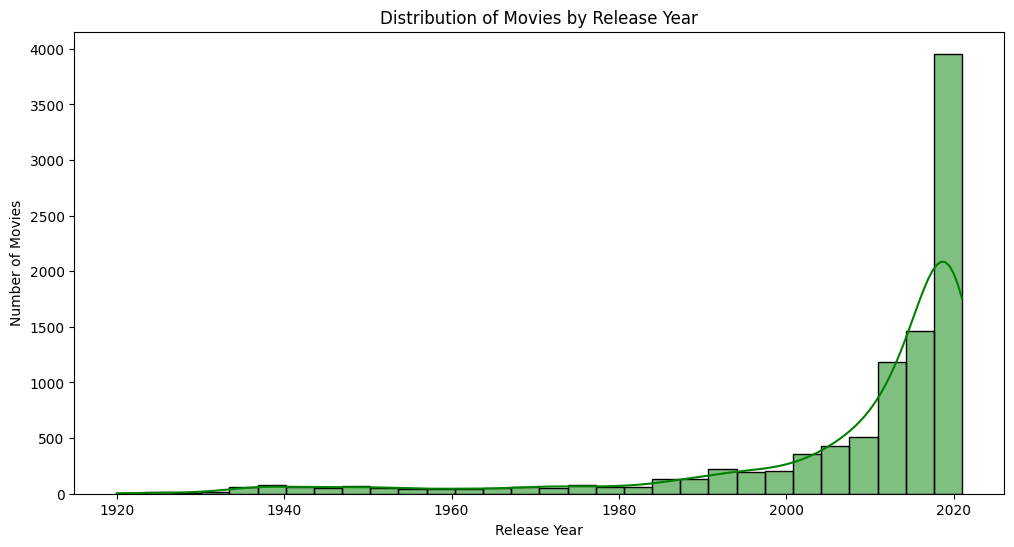

In [23]:
# Yillalara gore film gosterimlerinin histogram grafigini olusturualim
# Let's create a histogram graph of movie showings by year

plt.figure(figsize = (12,6))
sns.histplot(data['release_year'], bins= 30, kde = True , color = 'green')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

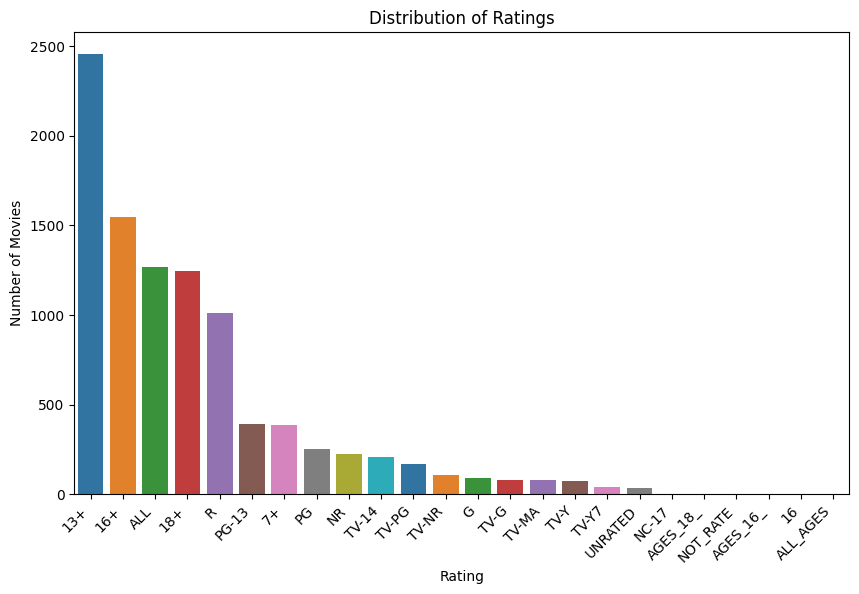

In [24]:
# Countplot ile de rating siralamasi ollusturuyoruz.
# We also create a rating ranking with Countplot.

plt.figure(figsize = (10,6))
sns.countplot(x = 'rating', data = data, order = data['rating'].value_counts().index, palette = 'tab10')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

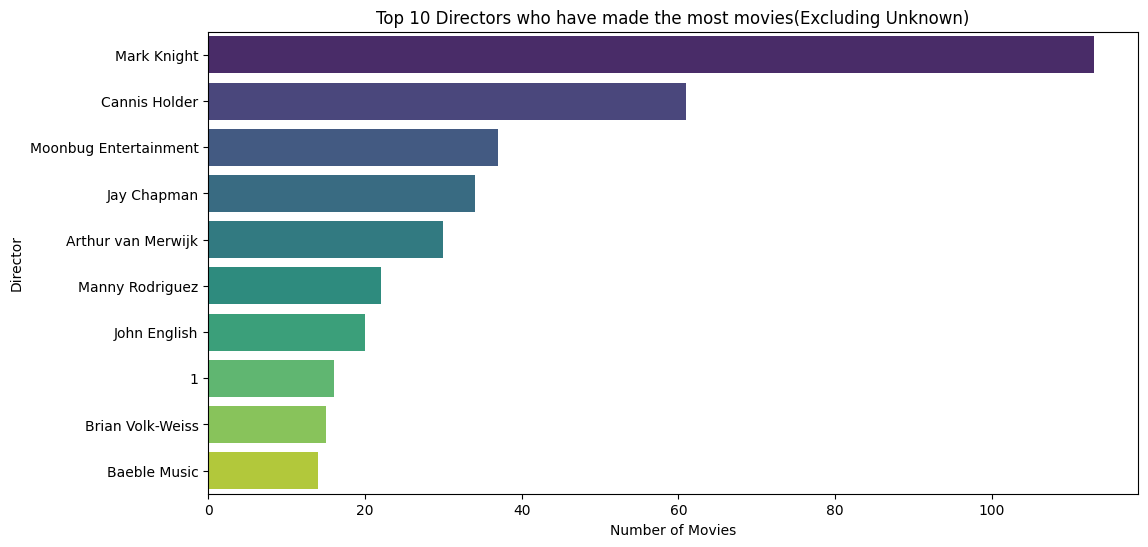

In [25]:
#Top 10 Directors who have made the most movie grafigi

plt.figure(figsize=(12,6))
sns.barplot(x= top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors who have made the most movies(Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

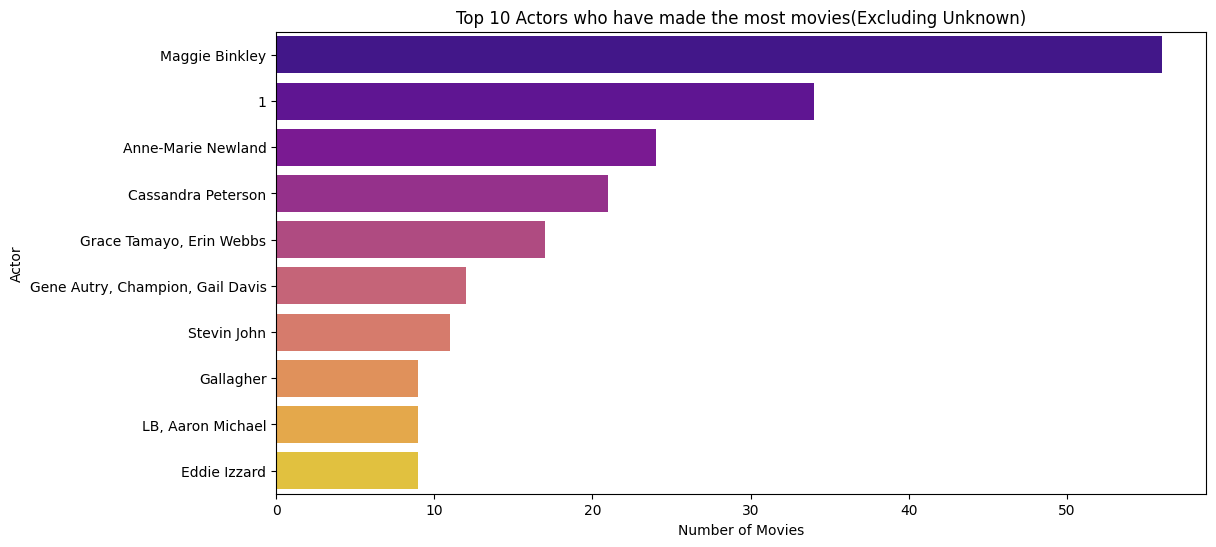

In [26]:
#Top 10 Actors who have made the most movies grafigi

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')
plt.title('Top 10 Actors who have made the most movies(Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

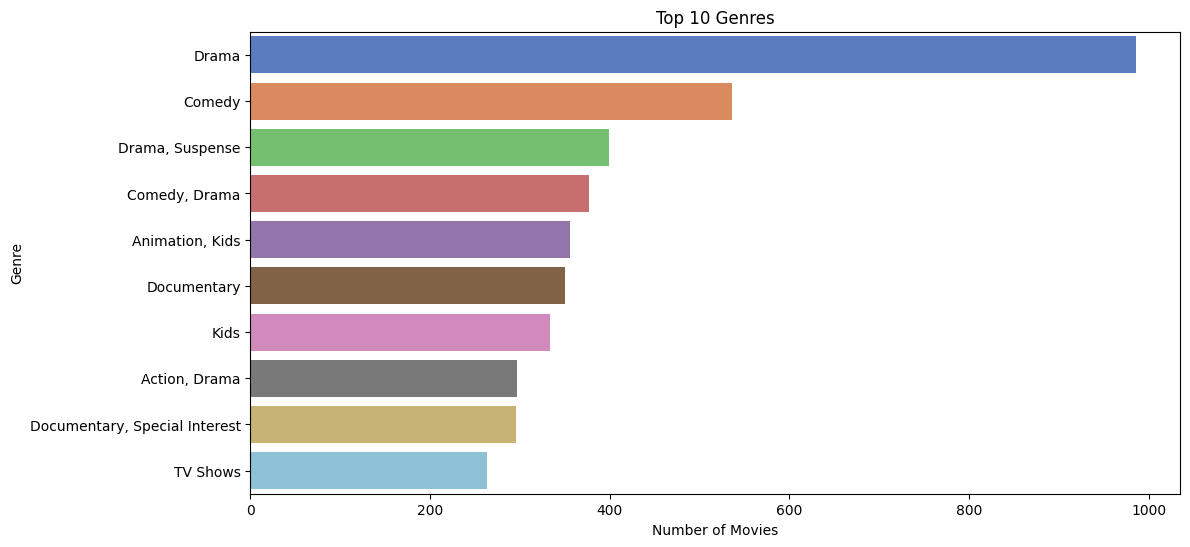

In [27]:
# Ilk once grafik icin bir top_genres siralamasi
# First a top_genres ranking for the chart
top_genres = data['listed_in'].value_counts().head(10)

#genre siralamasi top10 grafigi
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

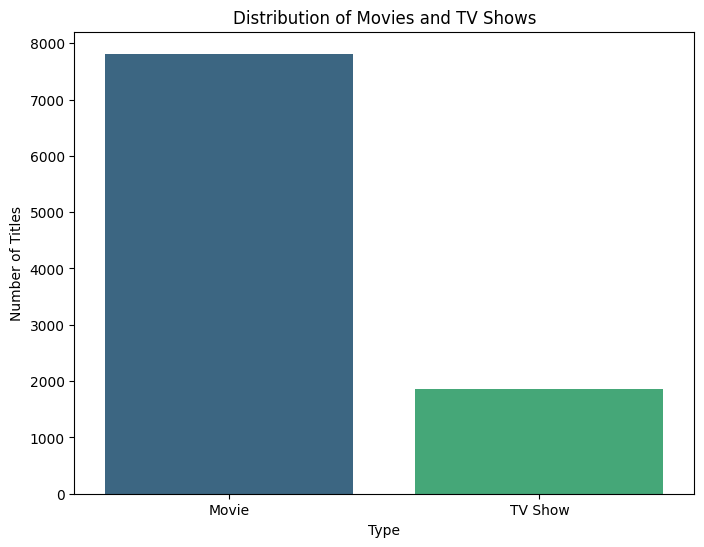

In [28]:
# tv show ve movie karsilatirmasi

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()

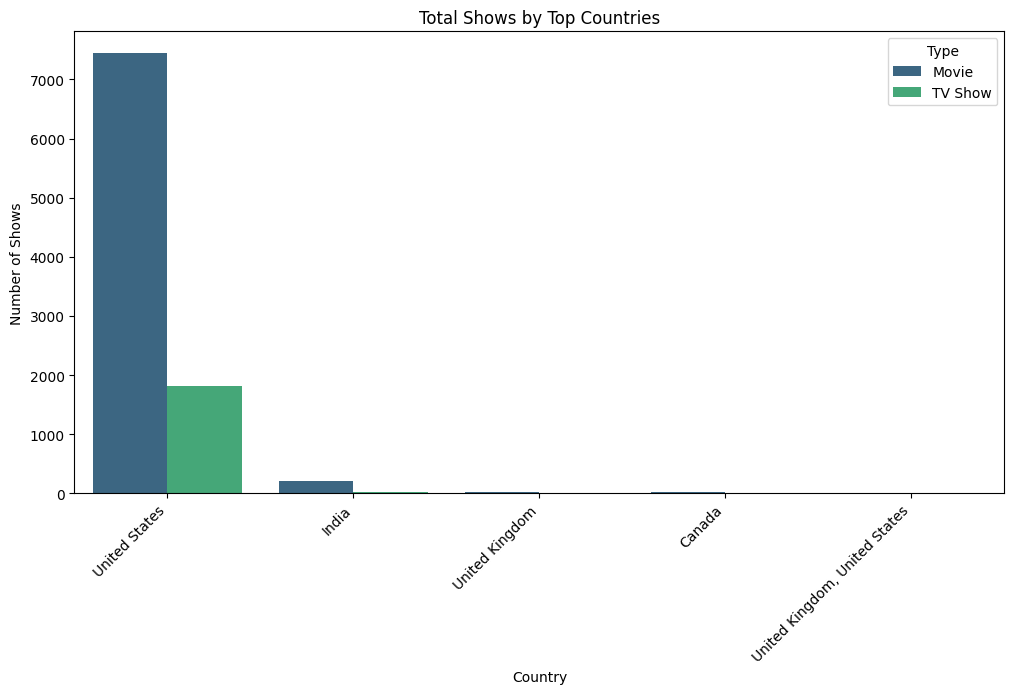

In [29]:
# Top 5 en cok film yapan ulkeler # Top 5 countries that make the most movies
top_countries = data['country'].value_counts().head(5).index

# en cok yapan ulkeleri filtereledik # we filtered the countries that do the most
filtered_data = data[data['country'].isin(top_countries)]

# gorsellestirmesi #viz
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=filtered_data, hue='type', order=top_countries, palette='viridis')
plt.title('Total Shows by Top Countries')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

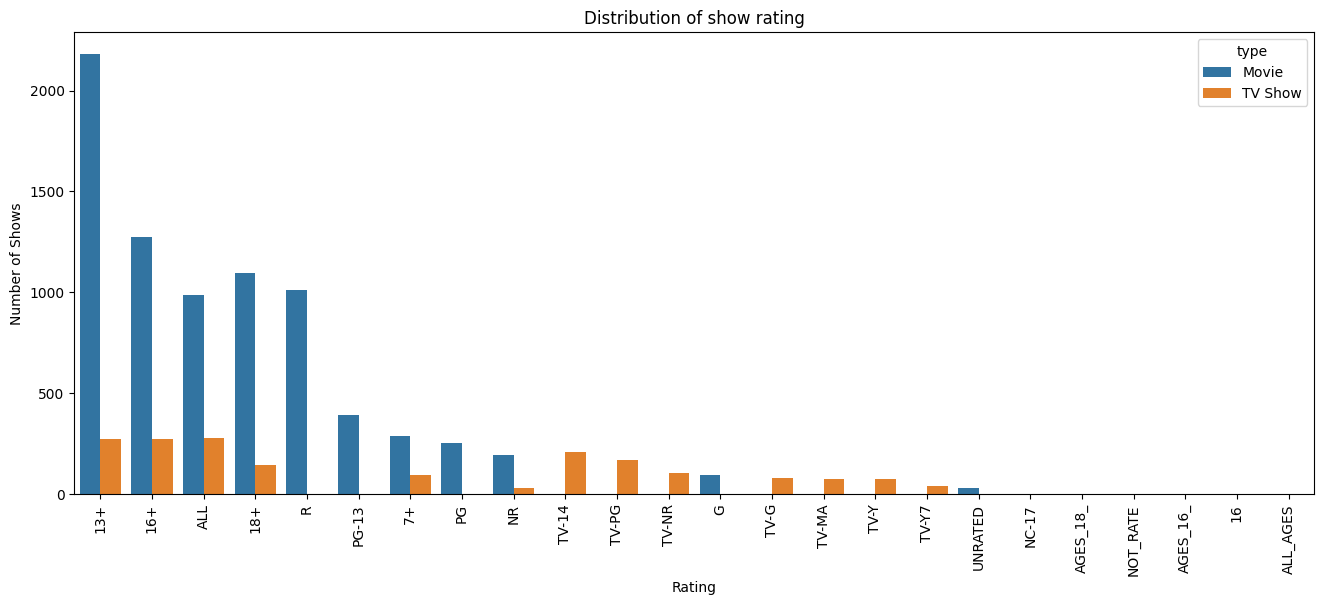

In [30]:
#rating e gore tv show ve film karilastirmasi
#comparison of tv shows and movies by rating

data_count1=data['rating'].value_counts().reset_index()
plt.figure(figsize=(16,6))
sns.countplot(x='rating',data=data,hue='type',order=data['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of show rating')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.show()